<a href="https://colab.research.google.com/github/cendron/seguidor/blob/main/06_Aperfei%C3%A7oamento_02_Controle_proporcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melhorias no software do Robô

## 2. Controle proporcional

Seguindo a lógica do algoritmo acima, para melhorar ainda mais o robô poderiamos criar mais estados. 

Se o valor for positivo:
*   1: Leve curva para a direita
*   2: Um pouco mais acentuada que o item acima
*   3: Um pouco mais acentuada que o item acima
*   4: Um pouco mais acentuada que o item acima
*  ...
*   100: Curva fechada a direita

E valores negativos:
*   -1: Leve curva para a esquerda
*   -2: Um pouco mais acentuada que o item acima
*   -3: Um pouco mais acentuada que o item acima
*   -4: Um pouco mais acentuada que o item acima
*  ...
*   -100: Curva fechada a esquerda

E se o valor for igual a 0 (zero):
*   0: Siga em frente

A princípio, pensariamos em inserir ```if``` para cada um dos valores. 





In [ ]:
    # Esse código não executa, serve apenas para fins didáticos
    if (nivel == 99):
        curva(0, -20)
    elif (nivel == 98):
        curva(1, -19)
    elif (nivel == 97):
        curva(2, -18)    
    ...
    elif (nivel == 0):
        andarReto(20)
    elif (nivel == -1):
        curva(19, 20)
    ...
    elif (nivel == -99):
        curva(-20, 0)


Porém, existe outra técnica ainda melhor, o **Controle proporcional** pode atuar de maneira infinita, calculando a diferença entre os sensores e fazendo a correção entre eles. 

Se o valor da diferença for positivo:
*   O robô deve ir para a direita
*   O motor Esquerdo deve girar mais (Somado valor)
*   O motor Direito deve girar menos (Subtraído valor)

Se o valor da diferença for negativo:
*   O robô deve ir para a esquerda
*   O motor Direito deve girar mais (Somado valor)
*   O motor Esquerdo deve girar menos (Subtraído valor)

Um valor de GANHO será utilizado para fazer as correções de forma mais acentuada. 

Assim a fórmula fica:

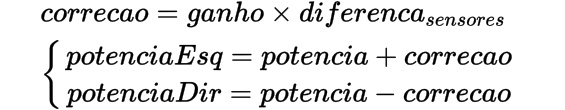

E em programação:

In [ ]:
    correcao = 0.25 * nivel
    potenciaEsq = 10 + correcao
    potenciaDir = 10 - correcao

Onde os valores podem ser ajustados para melhorar o desempenho do robô. 

E o programa completo:

In [ ]:
#!/usr/bin/env pybricks-micropython

from pybricks.parameters import *
from pybricks.hubs import EV3Brick
from pybricks.ev3devices import *
from pybricks.tools import wait
from pybricks.robotics import DriveBase

ev3 = EV3Brick()

sensorEsq = ColorSensor(Port.S1)
sensorDir = ColorSensor(Port.S2)
motorEsquerdo = Motor(Port.A)
motorDireito = Motor(Port.B)

def lerCores():
    nivelEsq = sensorEsq.reflection()
    nivelDir = sensorDir.reflection()
    return [nivelEsq, nivelDir]
    
def andar(potenciaEsq, potenciaDir):
    motorEsquerdo.dc(potenciaEsq)
    motorDireito.dc(potenciaDir)

while (True):
    [nivelEsq, nivelDir]  = lerCores()
   
    # Calcula a diferença entre os sensores
    nivel = nivelEsq - nivelDir
    
    # Calcula o Controle proporcinal
    correcao = 0.25 * nivel
    potenciaEsq = 10 + correcao
    potenciaDir = 10 - correcao
    
    # Envia a potência para cada motor
    andar(potenciaEsq, potenciaDir)